<a href="https://colab.research.google.com/github/IANGECHUKI176/deeplearning/blob/main/pytorch/convnets/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

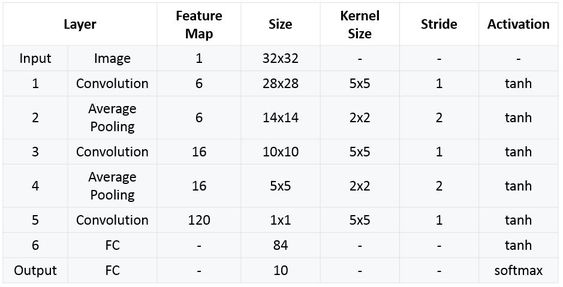

In [ ]:
class LeNet(nn.Module):
    def __init__(self,in_channels=1):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels = in_channels,out_channels=6,kernel_size = 5,stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 6,out_channels = 16,kernel_size = 5,stride = 1)
        self.conv3 = nn.Conv2d(in_channels=16,out_channels = 120,kernel_size= 5,stride = 1)
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,10)

        self.pool = nn.AvgPool2d(kernel_size = 2,stride = 2)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))

        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        return x

In [ ]:
net = LeNet()
input = torch.randn(64, 1, 32, 32)
net(input).shape

torch.Size([64, 10])